**Desafio Inferência Tera 2022**



In [ ]:
#importando biblioteca pandas
#importando biblioteca numpy
#importando biblioteca seaborn 
#importando biblioteca matplotlib 
#Instalando pacote Yahoo Financials
#from yahoofinancials import YahooFinancials
#https://books.google.com.br/books?id=qJXOOEF2i1wC&pg=PA51&dq=ARIMA&hl=pt-BR&sa=X&redir_esc=y#v=onepage&q=ARIMA&f=false
#Existe uma correlação dolar x ouro?
#criando um gráfico estatístico para visualização gráfica, representando um grupo de dados numéricos por meio de seus quartis
#Este gráfico exibe o resumo do conjunto de dados contendo os cinco valores conhecidos como mínimo, 
#quartil 1, quartil 2 ou mediana, quartil 3 e máximo, onde a caixa é desenhada do primeiro quartil ao terceiro quartil.
#Sintaxe: seaborn.stripplot (*, x = None, y = None, hue = None, data = None, order = None, hue_order = None, jitter = True, 
#dodge = False, orient = None, color = None, palette = Nenhum, tamanho = 5, edgecolor = 'cinza', largura de linha = 0, ax = Nenhum, ** kwargs)
#E, fazendo a plotagem dos dados com Matplotlib e analisando suas autocorrelações
#Parâmetros:

#x, y, hue: Entradas para traçar dados de formato longo.
#dados: Conjunto de dados para plotagem.
#ordem: é a ordem para traçar os níveis categóricos.
#cor: é a cor de todos os elementos ou a semente de uma paleta de gradiente.
#Retorna: Este método retorna o objeto Axes com o gráfico desenhado nele.

In [ ]:
!pip install yfinance
!pip install yahoofinancials
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 6.4 MB 8.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel f

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from pandas_datareader import data
import yfinance as yf
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from pmdarima.model_selection import train_test_split
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from fbprophet import Prophet
from pandas import to_datetime
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit
import warnings
import datetime
from datetime import datetime
warnings.filterwarnings('ignore')


In [ ]:
rypto = yf.download("BTC-USD", start='2014-01-01', end='2022-04-30')
ouro =  yf.download("GC=F", start='2014-01-01', end='2022-04-30')
dolar = yf.download('DX=F', start='2014-01-01', end='2022-04-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**ANÁLISE EXPLORATÓRIA DE DADOS** 

°**OURO, DÓLAR - USD**

In [ ]:
#Análise do Ouro GC=F

In [ ]:
ouro.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21',
               '2022-04-22', '2022-04-25', '2022-04-26', '2022-04-27',
               '2022-04-28', '2022-04-29'],
              dtype='datetime64[ns]', name='Date', length=2095, freq=None)

In [ ]:
#Análise do Dólar DX=F

In [ ]:
dolar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2094 entries, 2014-01-02 to 2022-04-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2094 non-null   float64
 1   High       2094 non-null   float64
 2   Low        2094 non-null   float64
 3   Close      2094 non-null   float64
 4   Adj Close  2094 non-null   float64
 5   Volume     2094 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 114.5 KB


In [ ]:
acoes_df = ouro.copy()

In [ ]:
#Analisando ações - USD

In [ ]:
#Ouro
acoes_df['ouro_open']       = ouro['Open']
acoes_df['ouro_high']       = ouro['High']
acoes_df['ouro_low']        = ouro['Low']
acoes_df['ouro_close']      = ouro['Close']
acoes_df['ouro_adj_close']  = ouro['Adj Close']
acoes_df['ouro_volume']     = ouro['Volume']

#Dolar
acoes_df['dolar_open']      = dolar['Open']
acoes_df['dolar_high']      = dolar['High']
acoes_df['dolar_low']       = dolar['Low']
acoes_df['dolar_close']     = dolar['Close']
acoes_df['dolar_adj_close'] = dolar['Adj Close']
acoes_df['dolar_volume']    = dolar['Volume']

In [ ]:
acoes_df.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21',
               '2022-04-22', '2022-04-25', '2022-04-26', '2022-04-27',
               '2022-04-28', '2022-04-29'],
              dtype='datetime64[ns]', name='Date', length=2095, freq=None)

In [ ]:
acoes_df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [ ]:
acoes_df = acoes_df['2014-09-17':]
acoes_df

,ouro_open,ouro_high,ouro_low,ouro_close,ouro_adj_close,ouro_volume,dolar_open,dolar_high,dolar_low,dolar_close,dolar_adj_close,dolar_volume
Date,,,,,,,,,,,,
2014-09-17,1236.199951,1236.199951,1221.900024,1234.400024,1234.400024,10,84.235001,84.860001,84.074997,84.486000,84.486000,66612.0
2014-09-18,1216.199951,1225.699951,1216.199951,1225.699951,1225.699951,5,84.864998,84.900002,84.339996,84.430000,84.430000,32280.0
2014-09-19,1218.300049,1218.300049,1215.300049,1215.300049,1215.300049,4,84.370003,84.934998,84.334999,84.864998,84.864998,37092.0
2014-09-22,1214.900024,1216.800049,1212.400024,1216.800049,1216.800049,7,84.930000,84.974998,84.644997,84.862999,84.862999,18199.0
2014-09-23,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,5,84.805000,84.875000,84.459999,84.778999,84.778999,24751.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,1925.000000,1925.000000,1889.300049,1893.199951,1893.199951,748,101.105003,101.864998,101.050003,101.768997,101.768997,19568.0
2022-04-26,1900.500000,1909.099976,1894.000000,1901.400024,1901.400024,302,101.705002,102.370003,101.535004,102.318001,102.318001,23219.0
2022-04-27,1897.800049,1900.599976,1882.199951,1885.900024,1885.900024,1786,102.330002,103.290001,102.239998,102.962997,102.962997,37470.0


In [ ]:
# verificando se há valores faltantes
acoes_df.isnull().sum()

ouro_open          0
ouro_high          0
ouro_low           0
ouro_close         0
ouro_adj_close     0
ouro_volume        0
dolar_open         1
dolar_high         1
dolar_low          1
dolar_close        1
dolar_adj_close    1
dolar_volume       1
dtype: int64

**Box Plot é um gráfico estatístico para visualização gráfica, representando um grupo de dados numéricos por meio de seus quartis.**

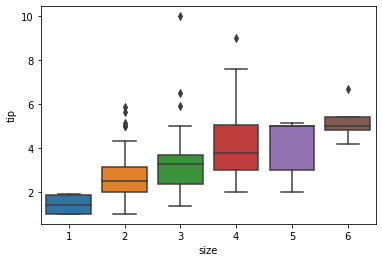

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt 
tdata = sns.load_dataset('tips') 
sns.boxplot(x='size', y='tip', data=tdata) 
plt.show() 

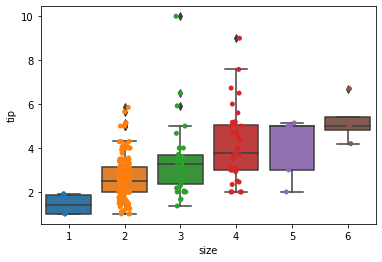

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt 
tdata = sns.load_dataset('tips') 
sns.boxplot(x='size', y='tip', data=tdata) 
sns.stripplot(x='size', y='tip', data=tdata) 
plt.show() 